Testing with getbest=False 

In [1]:
from rdkit import Chem # for editing the molecules from smiles (1D) to 2D
#from rdkit.Chem import AllChem # what is this used for ???
from rdkit.Chem import Draw # for drawing the molecules 
#from rdkit.Chem.Draw import IPythonConsole - ?????
import py3Dmol 
from ipywidgets import interact, interactive, fixed # For interactive display of conformers
from espsim import EmbedAlignConstrainedScore, EmbedAlignScore, ConstrainedEmbedMultipleConfs, GetEspSim, GetShapeSim # for shape and charge calculations 
import pandas as pd # For opening molecules file 
import matplotlib.pyplot as plt # For making scatter plots 
import numpy as np # editing plots and coefficient correlation 
import numpy
import scipy.stats as ss # For ranking data 
from scipy.stats import spearmanr # Spearman rank 

In [3]:
# Probe molecule 
prbSmile='C(C(C(=O)O)O)O'
prbMol=Chem.AddHs(Chem.MolFromSmiles(prbSmile)) # Adding H to the molecules since the Smiles do no include H

# Reference molecules 
header_list=["smiles"] # making the column 
refSmiles = pd.read_csv('/Users/yada/Documents/UCL/Dissertation/deepFMPOv3D-main/Data/molecules.smi',header=None,names=header_list) # Opening data file 
refMols=[Chem.AddHs(Chem.MolFromSmiles(x)) for x in refSmiles["smiles"]] # for each of the molecules in refSmiles it is changing smiles in molecule and adding Hs that are missing 




In [ ]:
# GASTEIGER 

# Calling functions for calculating partial charges similarity with the faster option 
simShape_Gas,simEsp_Gas=EmbedAlignScore(prbMol,refMols,getBestESP=False,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "gasteiger") 

# Calculating average 
avrlist_Gas=[] # Creating empty list as the other values in the table are lists 
for i in range(len(refSmiles)): # going through the length of refSmiles starting from 0 when it counts 
    avr=(simShape_Gas[i]+simEsp_Gas[i])/2
    avrlist_Gas.append(avr) # Adding each value into the list 

# Ranking 
rank_Gas_Shape = ss.rankdata(simShape_Gas) # Ranking shape 
rank_Gas_ESP = ss.rankdata (simEsp_Gas) # Ranking ESP
rank_Gas_avr = ss.rankdata(avrlist_Gas) # Ranking average values 

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average")) # Column headings 
for i in range(len(refSmiles)): #going through the length of refSmiles starting from 0 when it counts 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_Gas[i],simEsp_Gas[i],avr,rank_Gas_Shape[i],rank_Gas_ESP[i],rank_Gas_avr[i]))

  

In [28]:
# MMFF 

simShape_mmff,simEsp_mmff=EmbedAlignScore(prbMol,refMols,getBestESP=False,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "mmff") 

avrlist_mmff=[]
for i in range(len(refSmiles)): 
    avr=(simShape_mmff[i]+simEsp_mmff[i])/2
    avrlist_mmff.append(avr)

rank_mmff_avr = ss.rankdata(avrlist_mmff)
rank_mmff_Shape = ss.rankdata(simShape_mmff)
rank_mmff_ESP = ss.rankdata(simEsp_mmff)

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average"))
for i in range(len(refSmiles)): 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_mmff[i],simEsp_mmff[i],avr,rank_mmff_Shape[i],rank_mmff_ESP[i],rank_mmff_avr[i]))
  
    

hello


RDKit ERROR: [14:09:48] UFFTYPER: Unrecognized charge state for atom: 16
[14:09:48] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [14:12:22] UFFTYPER: Unrecognized charge state for atom: 17
[14:12:22] UFFTYPER: Unrecognized charge state for atom: 17
RDKit ERROR: [14:12:57] UFFTYPER: Unrecognized charge state for atom: 16
[14:12:57] UFFTYPER: Unrecognized charge state for atom: 16


MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
                                                           Reference    Shape     ESP    Average Rank Shape Rank ESP Rank Average
    S(=O)(=O)(N)c1ccc(N/N=C/2\C(=O)Nc3c\2c(/C=C/c2ccc(O)cc2)ccc3)cc1     0.22     0.12     0.19   261.00   677.00   624.00
    S(=O)(=O)(Nc1cc(-c2[nH]nc(Nc3ccc(S(=O)(=O)N)cc3)c2)ccc1)c1ccccc1     0.21     0.06     0.19   160.00   544.00   470.00
                           O=Nc1c(-c2c(O)[nH]c3c2cccc3)[nH]c2c1cccc2     0.35     0.21     0.19  1017.00   846.00   937.00
            O=C1NC(=O)c2c3c4n(c5c3cccc5)C3OC(n5c4c(c4c5cccc4)c12)CC3     0.25    

In [6]:
# Correlation coefficient function  

def CorrCoef (x,y):
    corr_matrix = numpy.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    print ('Correlation coeffcient = %.3f' % R_sq)
    return

# Spearmans rank Function 

def SpearRank (x,y):
	# Calculating correlation coefficient 
	coef, p = spearmanr(x,y)
	print('Spearmans correlation coefficient: %.3f' % coef)
	# Interpret the significance 
	

# Running the example calculates the Spearman’s correlation coefficient between the two variables in the test dataset.

# The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely 
# 95% confidence of rejecting hypothesis 



SIMILARITY SCORES

Correlation coeffcient = 0.005
Spearmans correlation coefficient: 0.029


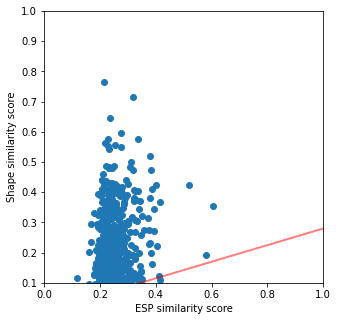

In [7]:
# Shape vs ESP similarity scores 

# Setting size of plot 
fig, ax = plt.subplots(figsize = (5,5)) 
# Setting axis ranges 
plt.xlim(0,1) # Similarity calculations ranges from 0-1, the closer to 1 the higher the similarity 
plt.ylim(0.1)
#Setting axis labels and plot title 
plt.xlabel("ESP similarity score")
plt.ylabel("Shape similarity score")
# this is the order that you have to follow 
# important to set up the axis labels and ranges before presenting the plot 

# Add scatterplot 
ax.scatter (simShape_Gas, simEsp_Gas ) 

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(simShape_Gas, simEsp_Gas, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

# Correlation coefficient 
CorrCoef(simShape_Gas, simEsp_Gas)

# Spearman rank 
SpearRank(simShape_Gas, simEsp_Gas)

Correlation coeffcient = 0.094
Spearmans correlation coefficient: 0.238


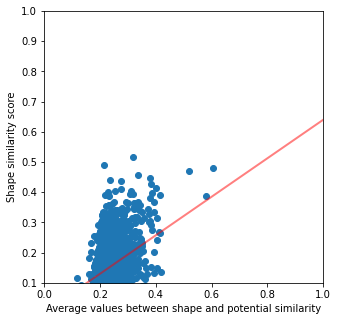

In [8]:

# Shape vs average 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1) 
plt.ylim(0.1)
plt.xlabel("Average values between shape and potential similarity")
plt.ylabel("Shape similarity score")

ax.scatter (simShape_Gas, avrlist_Gas ) 


b, a = np.polyfit(simShape_Gas, avrlist_Gas, deg=1)

xseq = np.linspace(0, 1)
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(simShape_Gas, avrlist_Gas)
SpearRank(simShape_Gas, avrlist_Gas)


Correlation coeffcient = 0.943
Spearmans correlation coefficient: 0.972


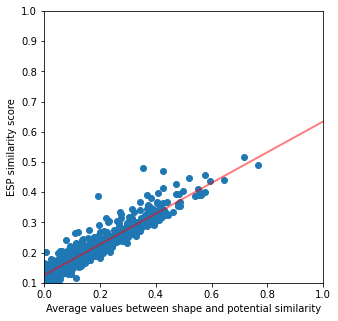

In [9]:
# ESP vs average 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1) 
plt.ylim(0.1)
plt.xlabel("Average values between shape and potential similarity")
plt.ylabel("ESP similarity score")

ax.scatter (simEsp_Gas, avrlist_Gas ) 


b, a = np.polyfit(simEsp_Gas, avrlist_Gas, deg=1)

xseq = np.linspace(0, 1)
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(simEsp_Gas, avrlist_Gas)
SpearRank(simEsp_Gas, avrlist_Gas)

COMPARING RANKINGS 

Correlation coeffcient = 0.001
Spearmans correlation coefficient: 0.029


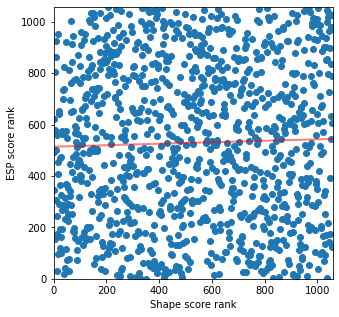

In [10]:
# Shape rank vs ESP rank 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("ESP score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_ESP ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_ESP)
SpearRank(rank_Gas_Shape, rank_Gas_ESP)

Correlation coeffcient = 0.057
Spearmans correlation coefficient: 0.238


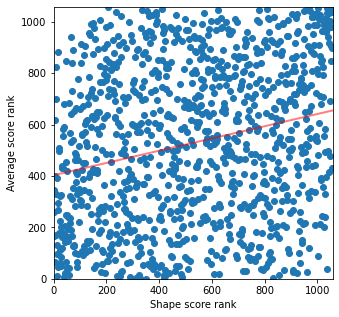

In [11]:
# Shape rank vs avr rank 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_avr)
SpearRank(rank_Gas_Shape, rank_Gas_avr)

Correlation coeffcient = 0.944
Spearmans correlation coefficient: 0.972


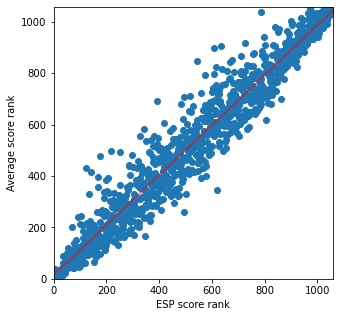

In [12]:
# EPS rank vs avr rank 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("ESP score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_ESP, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_ESP, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_ESP, rank_Gas_avr)
SpearRank(rank_Gas_ESP, rank_Gas_avr)

COMPARING PARTIAL CHARGES 

Correlation coeffcient = 0.924
Spearmans correlation coefficient: 0.972


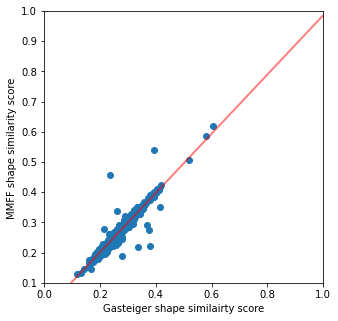

In [17]:

# Shape similarity scores Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Gasteiger shape similairty score")
plt.ylabel("MMFF shape similarity score ")
ax.scatter (simShape_Gas,simShape_mmff ) 

b, a = np.polyfit(simShape_Gas,simShape_mmff, deg=1)
xseq = np.linspace(0,1)
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(simShape_Gas,simShape_mmff)
SpearRank(simShape_Gas,simShape_mmff)



Correlation coeffcient = 0.024
Spearmans correlation coefficient: 0.151


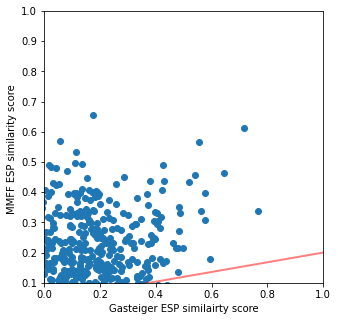

In [18]:
# ESP similarity scores Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Gasteiger ESP similairty score")
plt.ylabel("MMFF ESP similarity score ")
ax.scatter (simEsp_Gas,simEsp_mmff ) 

b, a = np.polyfit(simEsp_Gas,simEsp_mmff, deg=1)
xseq = np.linspace(0,1)
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(simEsp_Gas,simEsp_mmff)
SpearRank(simEsp_Gas,simEsp_mmff)

Correlation coeffcient = 0.048
Spearmans correlation coefficient: 0.204


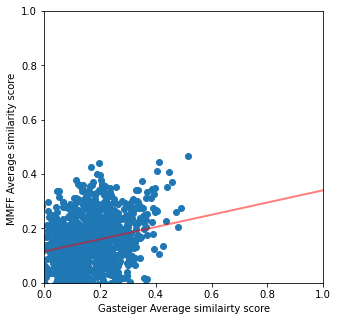

In [23]:
# Average similarity scores Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Gasteiger Average similairty score")
plt.ylabel("MMFF Average similarity score ")
ax.scatter (avrlist_Gas,avrlist_mmff) 

b, a = np.polyfit(avrlist_Gas,avrlist_mmff, deg=1)
xseq = np.linspace(0,1)
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(avrlist_Gas,avrlist_mmff)
SpearRank(avrlist_Gas,avrlist_mmff)

Correlation coeffcient = 0.944
Spearmans correlation coefficient: 0.972


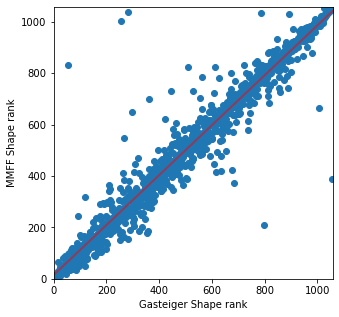

In [24]:
# Shape ranks Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(refSmiles)) 
plt.ylim(0,len(refSmiles))
plt.xlabel("Gasteiger Shape rank")
plt.ylabel("MMFF Shape rank")

ax.scatter (rank_mmff_Shape,rank_Gas_Shape) 
b, a = np.polyfit(rank_mmff_Shape,rank_Gas_Shape, deg=1)
xseq = np.linspace(0, len(refSmiles))  
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_Shape,rank_Gas_Shape)
SpearRank(rank_mmff_Shape,rank_Gas_Shape)


Correlation coeffcient = 0.023
Spearmans correlation coefficient: 0.151


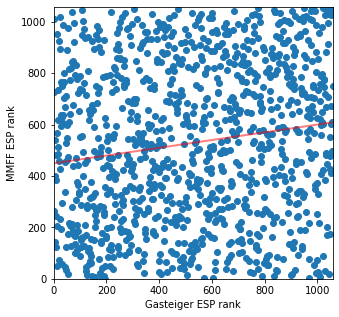

In [26]:
# ESP ranks Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Gasteiger ESP rank")
plt.ylabel("MMFF ESP rank")
ax.scatter (rank_mmff_ESP,rank_Gas_ESP) 

b, a = np.polyfit(rank_mmff_ESP,rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles)) 
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_ESP,rank_Gas_ESP)
SpearRank(rank_mmff_ESP,rank_Gas_ESP)


Correlation coeffcient = 0.042
Spearmans correlation coefficient: 0.204


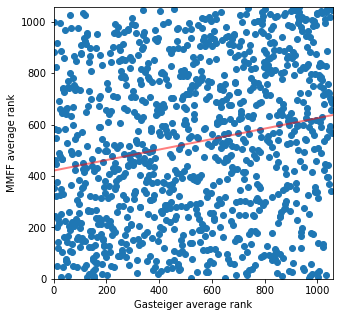

In [27]:
# Average ranks Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(refSmiles)) 
plt.ylim(0,len(refSmiles))
plt.xlabel("Gasteiger average rank")
plt.ylabel("MMFF average rank")
ax.scatter (rank_mmff_avr,rank_Gas_avr) 

b, a = np.polyfit(rank_mmff_avr,rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))  
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

# Correlation coefficient 
CorrCoef(rank_mmff_avr,rank_Gas_avr)
SpearRank(rank_mmff_avr,rank_Gas_avr)